In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import make_smoothing_spline

In [2]:
data_path = Path(os.environ["DATA_PATH"])

In [18]:
df = (
    pd.read_excel(data_path / "datos" / "AQ_Juarez_May2025.xlsx").assign(
        date=lambda df: pd.to_datetime(df["date"]),
    )
    # .set_index(["estacion", "date"])
    # .sort_index()
)

In [21]:
df["date"].min()

Timestamp('2025-03-01 00:00:00')

In [ ]:
grouped = df.groupby(level=1)["o3"].mean()
windowed = grouped.rolling("7D", center=True).mean()

grouped.plot()

ValueError: level > 0 or level < -1 only valid with MultiIndex

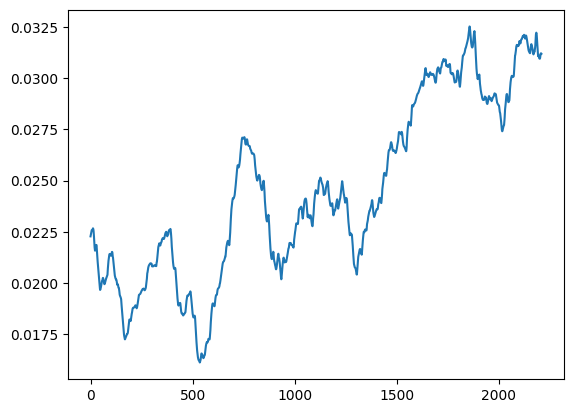

In [ ]:
spline = make_smoothing_spline(windowed.index, windowed.values)
plt.plot(spline(windowed.index))